# Capstone Project - Board Game Reviews
### by John Fonte

#### Within the last ten years, board games have returned to the cultural limelight.  During this period of time, dubbed the "__[Board Game Renaissance](https://www.usatoday.com/story/life/2017/07/31/bored-digital-games-join-board-game-renaissance/476986001/)__," board games have become more popular and more accessible to a wider audience. What is the reason for this renaissance? <br>
This Capstone Project aims to identify trends in board game statistics. Specifically, this Project aims to answer three questions: 
1. Are board game sales indeed increasing?
2. Do board game sales correlate with a higher scoring (i.e., "better") board game?
3. Which intrinsic characteristics of board games, if any, have caused this change in board games sales? <br>

This __[Kaggle dataset](https://www.kaggle.com/mrpantherson/board-game-data)__ was collected from __[BoardGameGeek](https://www.boardgamegeek.com)__ (BGG), the premiere website for board game information and ratings (i.e., the "IMDB" of board games). This data analyzes the top 5000 board games ranked by BGG.^ <br> <br>

(^really the top 4999 games, but for the sake of evenness, I continually refer to this dataset as the top 5000 games.)

# The Metrics used by BoardGameGeek

Among the other statistics analyzed herein, BoardGameGeek measures three (3) main characteristics of a board game: <br>
- __Average Rating:__ The mean of all ratings on a scale of 1-10 provided by registered users of the BGG website. Average ratings are provided for a board game when the number of user ratings is 30 or higher. <br> <br>
- __Geek Rating:__ A weighted 1-10 rating provided by BGG based on the Average Rating. The rating is weighted towards the "average" rating of 5.5. The calculation for the Geek rating is estimated as follows: (Average Rating * # ratings + (5.5 rating * 100 ratings) / (# ratings + 100 ratings). This calculation is only an estimate; __["the actual algorithim is kept secret to avoid manipulation."](https://boardgamegeek.com/wiki/page/BoardGameGeek_FAQ#toc4)__ It's important to note that __[not all board games are given a Geek Rating](https://boardgamegeek.com/browse/boardgame?sort=rank&rankobjecttype=subtype&rankobjectid=1&rank=16126#16126)__ __and therefore not all board games are formally ranked.__ <br><br>
- __Weight/Complexity Rating:__ A rating on a 1-5 scale provided by the BGG community measuring how __["complex"](https://boardgamegeek.com/wiki/page/Weight)__ a game is, including the length of a board game's rulebook, the proportion of time a player spends thinking and strategizing, and how long it takes to learn the rules of the game. <br> <br>
For purposes of this Capstone Project, the Geek Rating will be used and not the Average Rating.

## Table of Contents

Below is an overview of the various numerical board game characteristic comparisons that will be analyzed: <br>

1. __Overview of Relationships:__ A look at all of the numerical relationships via correlograms to see from a broad look if any correlations exist. <br> <br>

2. __Ownership Quantities by Year:__ Before asking why board game purchases have changed over recent years, we must identify whether board game purchases have indeed increased in recent years. <br> <br>

3. __Player Range:__ The first characteristic of board games to be analyzed. Do games that cater to certain player sizes fare better than others? <br><br>

4. __Average Time to Play Game:__ The second characteristic of board games to be analyzed. Are shorter games higher rated and/or purchased more? <br><br>

5. __Rating by Weight:__ The third characteristic of board games to be analyzed. Are more complex games higher rated than less complex ones? <br> <br>

6. __Rating by Year:__ In light of any correlations found in the three analyzed characteristics, are games 'better' in more recent years? <br> <br>

7. __Look at the Top 100 Games:__ Here, we look to see if correlations for the top 100 games are any different from any correlations within the entire dataset? <br> <br>

8. __Conclusion:__ An overall look at the amount of board games published each year and why that may be increasing in light of the previously analyzed characteristics. <br>

***

Note that __only numerical comparisons are analyzed here__, as the dataset provided did not readily separate non-numerical characteristics into singular traits; for example, for board game genre identification, one game would list "Fantasy, Party Game" as its genres, and another would list "Fantasy, Card Game." Because these lists were identified as a singular string within the Genre data column, these games would be considered to be in two different genres.  There is no easy way to separate the terms without NLP and/or other techniques beyond the scope of this project.


In [1]:
# Basic imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Analysis 1. Overview and Correlograms

Before delving into the data minutia, let's take a 30,000 feet approach to see whether there are any rough correlations that should be kept in mind moving forward.

In [2]:
df = pd.read_csv('~JFonte/PythonMaterials/Capstone_Boardgamedata/bgg_db_1806.csv')
df.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,89130.612523,2.019404,5.188038,99.785257,83.852971,115.717544,1997.739948,6.969392,6.088576,2013.458292,10.407281,3063.863573,2.343633
std,1443.231328,77203.598778,0.685282,7.801038,380.690824,317.251581,513.768868,143.192968,0.562825,0.483212,4750.834210,3.237645,6482.861008,0.808694
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,5.777730,5.640240,62.000000,0.000000,49.000000,0.000000
25%,1250.500000,11169.000000,2.000000,4.000000,30.000000,30.000000,30.000000,2003.000000,6.540560,5.726970,285.000000,8.000000,626.000000,1.735300
50%,2500.000000,71906.000000,2.000000,4.000000,52.500000,45.000000,60.000000,2010.000000,6.907890,5.905240,625.000000,11.000000,1204.000000,2.285700
75%,3749.500000,160456.500000,2.000000,6.000000,90.000000,90.000000,120.000000,2015.000000,7.339040,6.303585,1634.500000,12.000000,2751.500000,2.888900
max,4999.000000,248949.000000,8.000000,200.000000,17280.000000,17280.000000,22500.000000,2018.000000,9.159150,8.618580,77423.000000,42.000000,111807.000000,4.904800


<Figure size 1080x360 with 0 Axes>

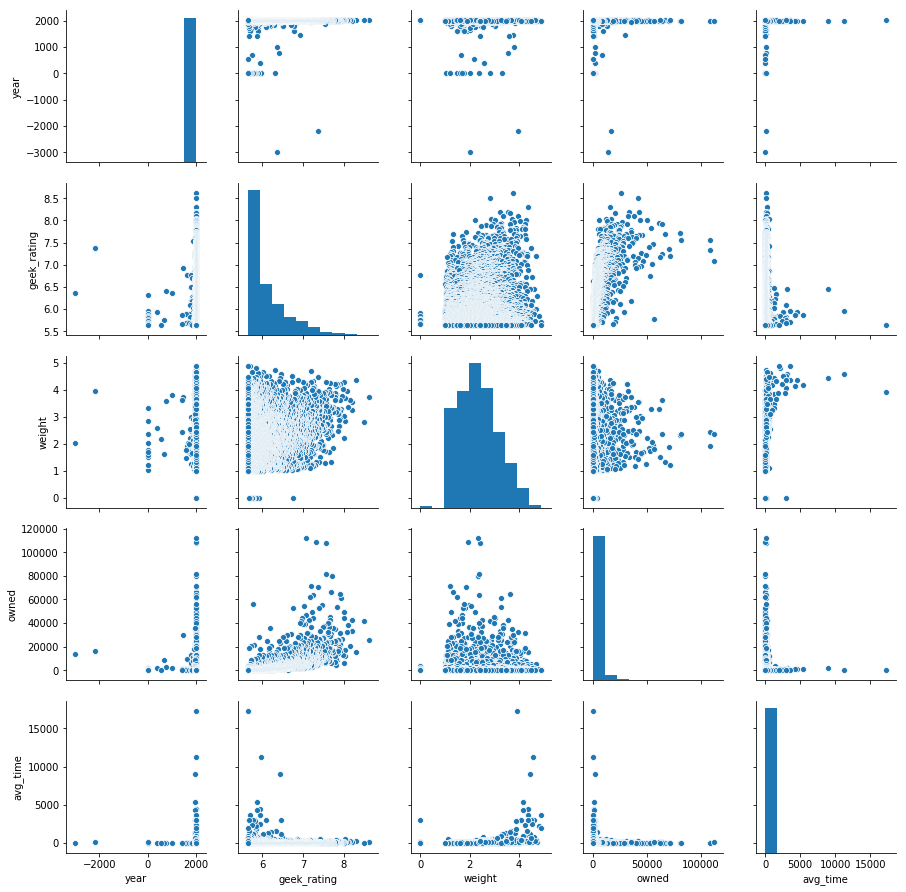

In [4]:
# Basic Correlogram
dfsubset = df[['year', 'geek_rating', 'weight', 'owned', 'avg_time', 'names']].copy()

plt.figure(figsize=(15,5))
sns.pairplot(dfsubset)
plt.show()

As we see here, most of the data is 'pushed' to one side of the axis. This is due to outliers. For example, games like "Chess" and "Go" were made before 2000 BCE, while the majority of the games analyzed were published in 1980 and after. Another example is the average time to complete a game. Most games can be played in 30 to 180 minutes. However, some games are purposely designed to be all day long campaigns or longer. As a bit of trivia, the longest expected play time for a board game is found in __["The Campaign for North Africa" (1979)](https://boardgamegeek.com/boardgame/4815/campaign-north-africa)__, which boasts a 60,000 minute, or 41 2/3 day, playtime. Not surprisingly, that game did not rank within the top 5000 games and is therefore not part of this dataset.<br>

Because various outliers pushed the data, I created a subset of the df dataset, which the majority of my analysis is based off of. The subset dataset that is analyzed below contains games that were __only published after 1979 and games with an average playtime of less than 250 minutes.__

In [6]:
# limiting variability of certain columns to avoid "pushing" the data to one side of the graph
dfsubset = dfsubset[dfsubset['year'] > 1979] # focusing on modern games - avoiding games like "Chess" or "Go" that
# would skew data
dfsubset = dfsubset[dfsubset['avg_time'] < 250] # focusing on non-all day campaign games
dfsubset.head()

,year,geek_rating,weight,owned,avg_time,names
0,2017,8.61858,3.7543,25928,90.0,Gloomhaven
1,2015,8.50163,2.8210,41605,60.0,Pandemic Legacy: Season 1
2,2015,8.30183,4.3678,15848,210.0,Through the Ages: A New Story of Civilization
3,2016,8.19914,3.2456,33340,120.0,Terraforming Mars
4,2005,8.19787,3.5518,42952,150.0,Twilight Struggle


<Figure size 1080x360 with 0 Axes>

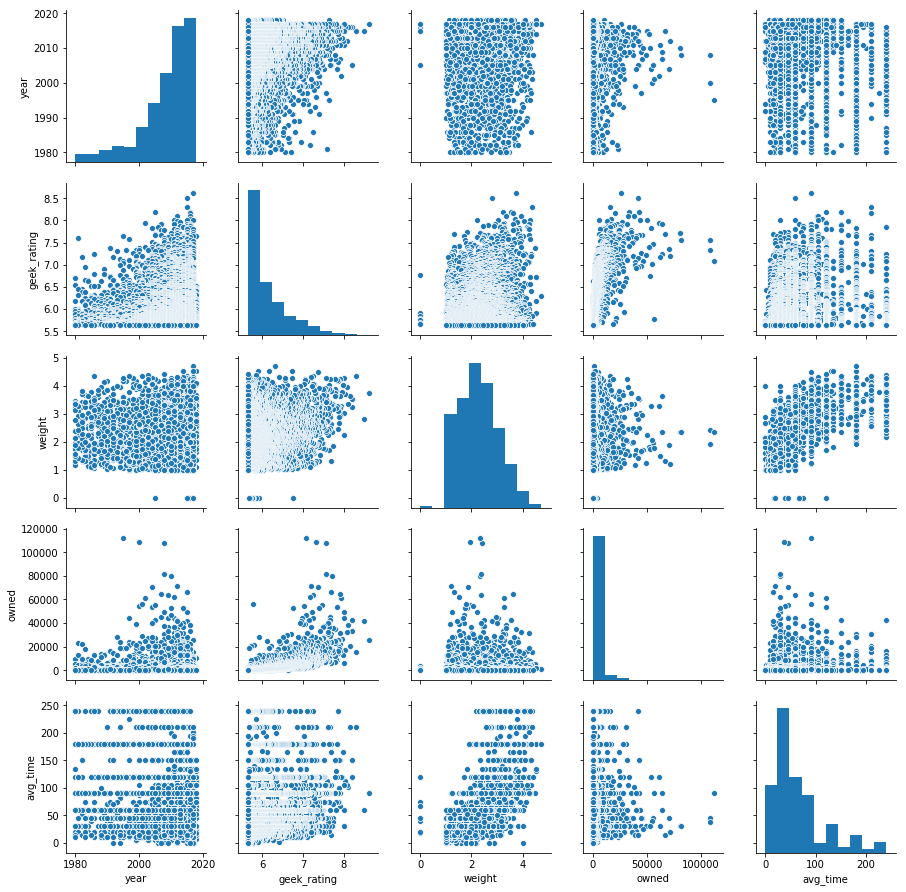

In [7]:
# Revised Correlogram by using dfsubset

plt.figure(figsize=(15,5))
sns.pairplot(dfsubset)
plt.show()

### Analysis - General Overview
As an overview, some correlations seem obvious (e.g., games that take longer to play are generally more complex and have a higher weight (col5,row3)). Others deserve a more-detailed analysis, such as games that were made more recently have higher ratings (col1, row2) and games that are higher rated are owned more (col2, row4).

## Analysis 2. Trends in Reported Ownership

How has ownership of board games changed over the years?

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

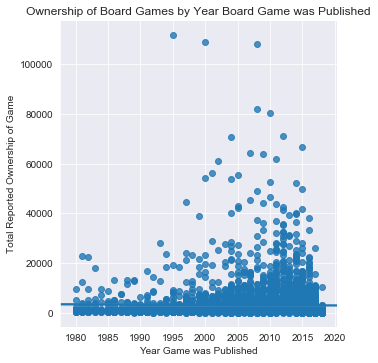

In [155]:
# ANALYSIS 2: Ownership Trends

# Looking at general ownership for individual games

plt.figure(figsize=(15,5))
sns.lmplot(x='year', y='owned', data=dfsubset)
plt.title('Ownership of Board Games by Year Board Game was Published')
plt.xlabel('Year Game was Published')
plt.ylabel('Total Reported Ownership of Game')

plt.show()

In [40]:
# Creating intervals for barplot to make sense of above scatterplot
dfyear80to90 = df[(df.year > 1980) & (df.year <= 1990)]
dfyear90to00 = df[(df.year > 1990) & (df.year <= 2000)]
dfyear00to10 = df[(df.year > 2000) & (df.year <= 2010)]
dfyear10to20 = df[df.year > 2010]

dfyearintervalownedtotal = [dfyear80to90.owned.sum(), dfyear90to00.owned.sum(),\
                          dfyear00to10.owned.sum(), dfyear10to20.owned.sum()]

[531705, 1553583, 5247622, 7406144]

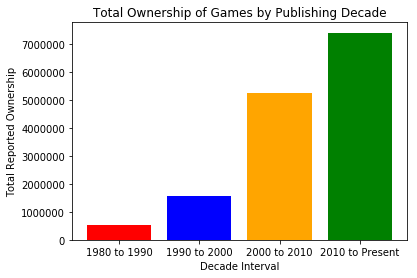

In [43]:
plt.bar(x=['1980 to 1990', '1990 to 2000', '2000 to 2010', '2010 to Present'], height=dfyearintervalownedtotal,
       color=('red', 'blue', 'orange', 'green'))

plt.title('Total Ownership of Games by Publishing Decade')
plt.xlabel('Decade Interval')
plt.ylabel('Total Reported Ownership')


plt.show()

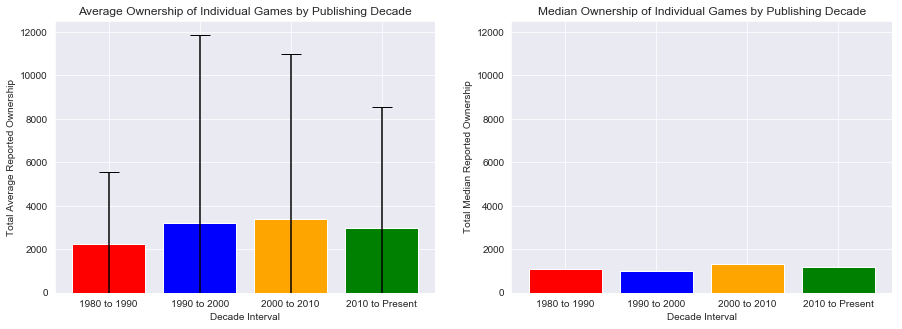

In [130]:
########### try ownership and median to see if difference

dfyearintervalownedavg = [dfyear80to90.owned.mean(), dfyear90to00.owned.mean(),\
                          dfyear00to10.owned.mean(), dfyear10to20.owned.mean()]

dfyearintervalownedstd = [dfyear80to90.owned.std(), dfyear90to00.owned.std(),\
                          dfyear00to10.owned.std(), dfyear10to20.owned.std()]

dfyearintervalownedmedian = [dfyear80to90.owned.median(), dfyear90to00.owned.median(),\
                          dfyear00to10.owned.median(), dfyear10to20.owned.median()]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x=['1980 to 1990', '1990 to 2000', '2000 to 2010', '2010 to Present'], height=dfyearintervalownedavg,
       yerr=dfyearintervalownedstd, capsize=10, 
        color=('red', 'blue', 'orange', 'green'))

plt.title('Average Ownership of Individual Games by Publishing Decade')
plt.xlabel('Decade Interval')
plt.ylabel('Total Average Reported Ownership')
plt.ylim(0, 12500)

plt.subplot(1,2,2)
plt.bar(x=['1980 to 1990', '1990 to 2000', '2000 to 2010', '2010 to Present'], height=dfyearintervalownedmedian,
        color=('red', 'blue', 'orange', 'green'))

plt.title('Median Ownership of Individual Games by Publishing Decade')
plt.xlabel('Decade Interval')
plt.ylabel('Total Median Reported Ownership')
plt.ylim(0, 12500)

plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


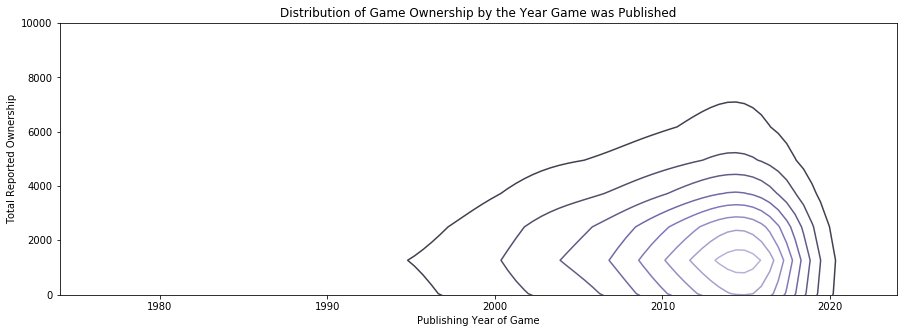

In [10]:
# Using KDE for two-variable ownership/year distribution analysis
dfsubsetownedkde = dfsubset[['year', 'owned']].copy()

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=dfsubsetownedkde, cmap='Purples_d')
plt.title('Distribution of Game Ownership by the Year Game was Published')
plt.xlabel('Publishing Year of Game')
plt.ylabel('Total Reported Ownership')
plt.ylim(-10,10000)

plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

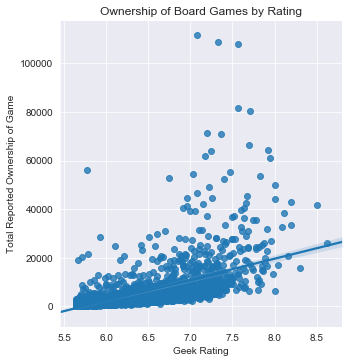

In [115]:
plt.figure(figsize=(15,5))
sns.lmplot(x='geek_rating', y='owned', data=dfsubset)
plt.title('Ownership of Board Games by Rating')
plt.xlabel('Geek Rating')
plt.ylabel('Total Reported Ownership of Game')

plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

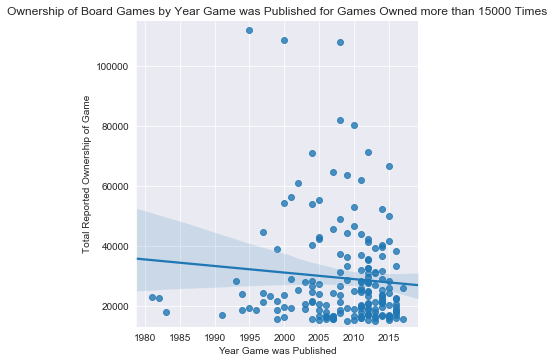

In [110]:
# Looking at top of the above graph - focusing on most owned games
dfownership15000 = dfsubset[dfsubset.owned >= 15000]

plt.figure(figsize=(15,5))
sns.lmplot(x='year', y='owned', data=dfownership15000)
plt.title('Ownership of Board Games by Year Game was Published for Games Owned more than 15000 Times')
plt.xlabel('Year Game was Published')
plt.ylabel('Total Reported Ownership of Game')
plt.ylim(13000, 115000)

plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

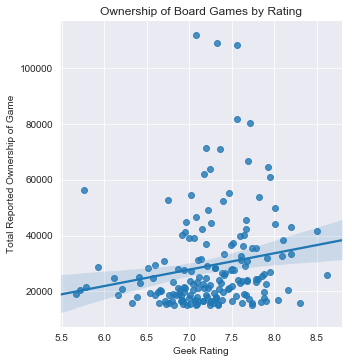

In [116]:
plt.figure(figsize=(15,5))
sns.lmplot(x='geek_rating', y='owned', data=dfownership15000)
plt.title('Ownership of Board Games by Rating')
plt.xlabel('Geek Rating')
plt.ylabel('Total Reported Ownership of Game')

plt.show()

In [29]:
# Looking at ownership for most owned board games by year

topownership = df[['names', 'year', 'geek_rating', 'owned']].copy()

In [31]:
topownership = df.sort_values(by=['owned'], ascending=False).reset_index(drop=True)
topownership.rename(columns={'names':'Name of Game', 'year':'Year', 'geek_rating':'Geek Rating', \
                             'owned':'Total Reported Ownership'}, inplace=True)

# don't know why .copy() didn't copy over only the columns I wanted, but the 'del' syntax fixed it...
del topownership['weight']
del topownership['avg_time']
del topownership['rank']
del topownership['bgg_url']
del topownership['game_id']
del topownership['min_players']
del topownership['max_players']
del topownership['min_time']
del topownership['max_time']
del topownership['avg_rating']
del topownership['num_votes']
del topownership['image_url']
del topownership['mechanic']
del topownership['category']
del topownership['age']
del topownership['designer']

BOLD = '\033[1m'
print(BOLD + 'These are the Top 10 Most Owned Board Games:')
topownership.head(10)

These are the Top 10 Most Owned Board Games:


,Name of Game,Year,Geek Rating,Total Reported Ownership
0,Settlers of Catan,1995,7.07593,111807
1,Carcassonne,2000,7.33059,108796
2,Pandemic,2008,7.56310,107996
3,Dominion,2008,7.56879,81790
4,7 Wonders,2010,7.71364,80301
5,Love Letter,2012,7.19747,71324
6,Ticket to Ride,2004,7.36423,70909
7,Codenames,2015,7.69843,66565
8,Agricola,2007,7.92319,64468
9,Small World,2009,7.24003,63736


### A Note on Data Bias for "Owned" Category

#### As a point of bias, this is "reported'' ownership on BGG. Of course, games like _Monopoly_ and _Scrabble_, both of which are found in this dataset, have sold millions, suggesting that these numbers are not wholly accurate. Even Dominion - the 4th top selling board game on this list - has __[sold over 2.5 million copies worldwide as of 2016.](https://www.thesprucecrafts.com/the-complete-guide-to-dominion-410905)__

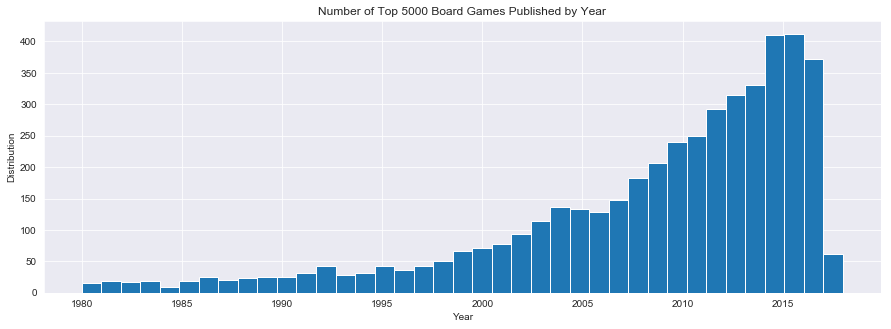

In [165]:
# Games publishing distribution by year

plt.figure(figsize=(15,5))
plt.hist(x=dfsubset.year, bins=39)
plt.title('Number of Top 5000 Board Games Published by Year')
plt.xlabel('Year')
plt.ylabel('Distribution')

plt.show()

### Analysis - Ownership Trends

According to the initial bar graph for total ownership, total ownership of games has __greatly increased over the years.__ A major reason for this is that many more games have been created in the last decade, as shown in the above histogram.  Because ownership is based on the number of times that a particular _game_ is reported owned and not total ownership by _user_, there is no bias in ownership increasing due to a simple "accumulation" of games over the years. <br>

Despite total ownership increasing, according to the KDE, scatterplot, average ownership bar, and median ownership bar graphs, ownership amounts of _individual_ board games have not generally changed over the years. This is even true when specifically looking at games that are reportedly owned a total of more than 15,000 times. <br>

But when looking at the top 10 most owned games, we see that all games were published in the last 25 years, and over half of the games were published within the last decade. This is a point of significance that needs to be explored further. There is a clear correlation between a game's score and its ownership quantity, for both games overall and the top 15000 games. Does that mean games made in most recent years are "better" designed and therefore more popular? How is this reconciled with the previous paragraph's conclusion that ownership of indiviual board games generally has not changed over the years? <br>

A more likely explanation, as shown by the skewed distribution of a large number of games being published in recent years, is that there is greater potential for at least _one_ of those games to be a universally-loved classic. In other words, there is just a higher chance of at least one of those games being good. At first glance, this appears to be true: a small fraction of highly owned top tier games would not greatly increase the ownership average, with the median being lower than the average. It made be that only a handful of top tier games just happen to be made more recently as a result of there just being a larger number of games being published recently.  <br>

In order to determine definitively whether (1) board games are generally becoming better "designed" and more fun in recent years, or (2) if a higher number of games published in a year simply suggests a higher possibility of viral popularity, we must look to the characteristics of such games. If there is no correlation between a certain characteristic of a game and a game's overall rating, then the data would suggest that there is nothing about the "game" that justifies the rating. Instead, it would suggest that a reason _other than_ the intrinsic design of board games in recent years is the cause for higher ownership. We look to the characteristics below to answer this question.

## Analysis 3. Player Counts of Board Games

Does a board game catering to a certain player count fare better than other board games?

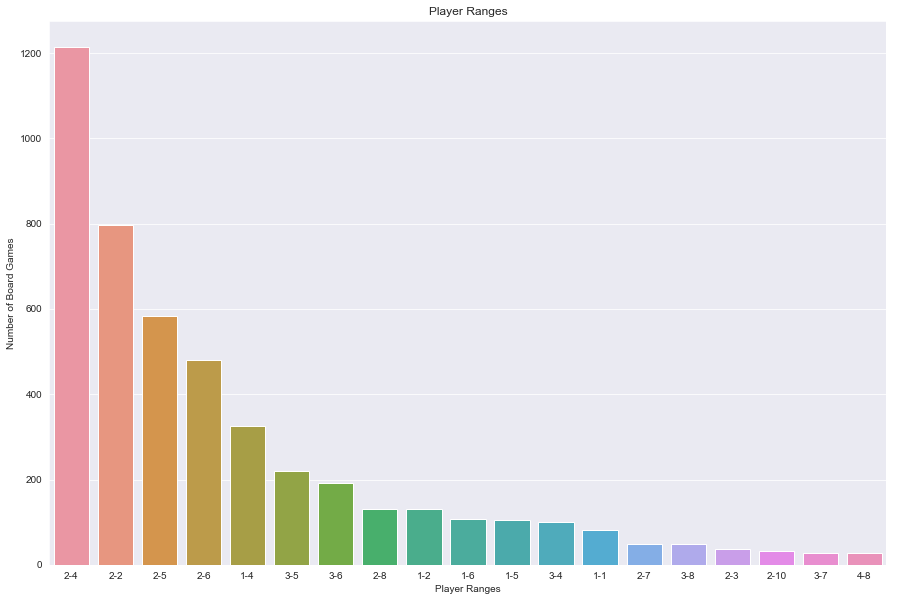

In [111]:
######### ANALYSIS 3: Average Player Counts

df['avgplayers'] = (df.min_players + df.max_players) / 2
df['avgplayers'].reset_index()

player_counts = df['avgplayers'].value_counts()
player_counts = player_counts[player_counts > 10]

plt.figure(figsize=(15,10)) 
df['playerrange'] = df.min_players.astype(str) + '-' + df.max_players.astype(str)
range_count = df['playerrange'].value_counts()
range_count = range_count[range_count > 25]
sns.barplot(x=range_count.index, y=range_count)
plt.title('Player Ranges')
plt.xlabel('Player Ranges')
plt.ylabel('Number of Board Games')

plt.show()

In [151]:
df2game = df.avgplayers[df.avgplayers == 2].count()
df2to4game = df.avgplayers[(df.avgplayers == 3) & (df.min_players != 1)].count()
df2to4game += df.avgplayers[(df.avgplayers == 2.5) & (df.min_players != 2)].count()
# ^^^ The extra addition into this count is because games ranging 1-4 are really 2-4 player games 
# with an alternative and ancillary "solitaire" mode

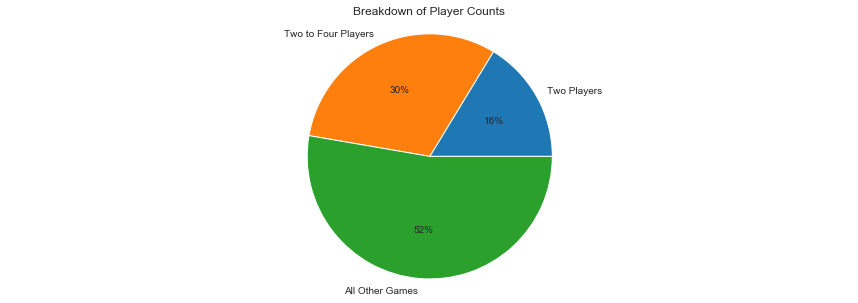

In [153]:
# I did some simple math to calculate these numbers - really just a .count with
# avg. players ==2, avg. players ==3 & min.players !=1, and subtracting the remainder from df.count()

pieplayercount = [df2game, df2to4game, (4999 - df2game - df2to4game)]
pieplayerlabels = ['Two Players', 'Two to Four Players', 'All Other Games']

plt.figure(figsize=(15,5)) 
plt.pie(pieplayercount, autopct='%d%%', labels=pieplayerlabels)
plt.axis('equal')
plt.title('Breakdown of Player Counts')
plt.show()

In [154]:
twopplgame = df[df['avgplayers'] == 2]
twotofourpplgame = df[(df['min_players'] >= 2) & (df['max_players'] <= 4) & (df['avgplayers'] != 2)]
otherpplgame = df[(df['avgplayers'] !=2) & ~((df['min_players'] >= 2) & (df['max_players'] <= 4))]

dfplayergrouping = twopplgame.merge(threetofourpplgame).merge(otherpplgame)

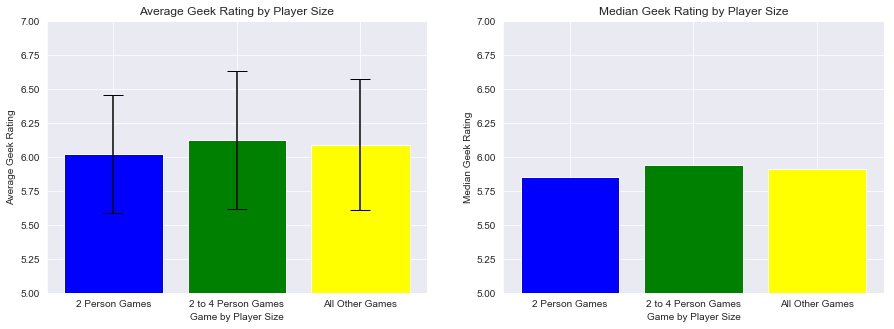

Overall Average Board Game Geek Rating is 6.088576191238247 +/- 0.48321249692462415.
Overall Median of Board Game Geek Ratings is 5.90524.


In [155]:
# Geek Ratings by Player Number Classification

playergroupingrating = [twopplgame.geek_rating, twotofourpplgame.geek_rating, \
                        otherpplgame.geek_rating]

playergroupingratingavg = [twopplgame.geek_rating.mean(), twotofourpplgame.geek_rating.mean(), \
                        otherpplgame.geek_rating.mean()]

playergroupingratingstd = [twopplgame.geek_rating.std(), twotofourpplgame.geek_rating.std(), \
                        otherpplgame.geek_rating.std()]

playergroupingratingmedian = [twopplgame.geek_rating.median(), twotofourpplgame.geek_rating.median(), \
                        otherpplgame.geek_rating.median()]

plt.figure(figsize=(15,5)) 
ax1 = plt.subplot(1,2,1)
ax1 = plt.bar(x=['2 Person Games', '2 to 4 Person Games', 'All Other Games'], 
              height=playergroupingratingavg, yerr=playergroupingratingstd, capsize=10,
             color=('blue', 'green', 'yellow'))
plt.ylim(5,7)
plt.ylabel('Average Geek Rating')
plt.xlabel('Game by Player Size')
plt.title('Average Geek Rating by Player Size')


######^^^^ FIX BY CHANGING TO PLT.BAR! SO MUCH BETTER!

 
ax2 = plt.subplot(1,2,2)
ax2 = plt.bar(x=['2 Person Games', '2 to 4 Person Games', 'All Other Games'], 
              height=playergroupingratingmedian, 
              color=('blue', 'green', 'yellow'))
plt.ylim(5,7)
plt.ylabel('Median Geek Rating')
plt.xlabel('Game by Player Size')
plt.title('Median Geek Rating by Player Size')



plt.show()

print("Overall Average Board Game Geek Rating is " + str(df.geek_rating.mean()) + " +/-" \
      + " " + str(df.geek_rating.std()) + ".")
print("Overall Median of Board Game Geek Ratings is " + str(df.geek_rating.median()) + ".")



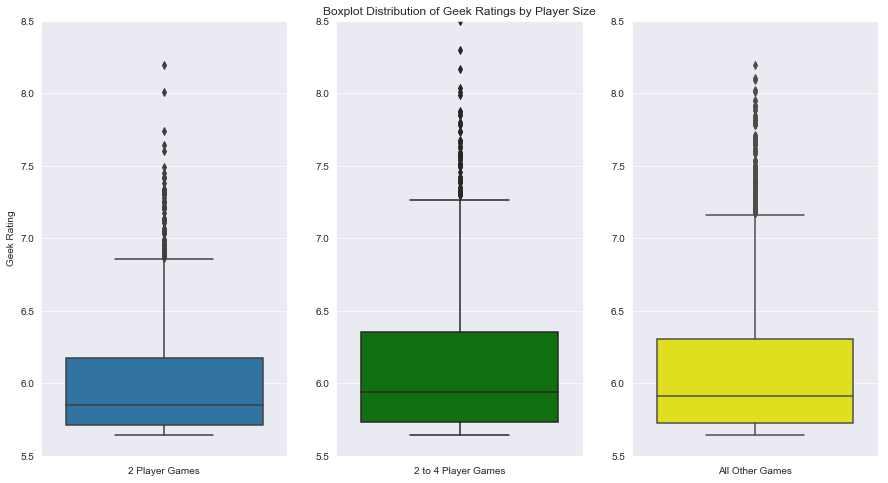

In [156]:
# Continued Analysis of Distribution Densities

plt.figure(figsize=(15,8))

ax1 = plt.subplot(1,3,1)
sns.boxplot(y=twopplgame.geek_rating)
plt.ylabel("Geek Rating")
plt.xlabel("2 Player Games")
plt.ylim(5.5, 8.5)


ax2 = plt.subplot(1,3,2)
sns.boxplot(y=twotofourpplgame.geek_rating, color='green')
plt.title("Boxplot Distribution of Geek Ratings by Player Size")
plt.xlabel("2 to 4 Player Games")
plt.ylabel(" ")
plt.ylim(5.5, 8.5)

ax3 = plt.subplot(1,3,3)
sns.boxplot(y=otherpplgame.geek_rating, color='yellow')
plt.xlabel("All Other Games")
plt.ylabel(" ")
plt.ylim(5.5, 8.5)

plt.show()

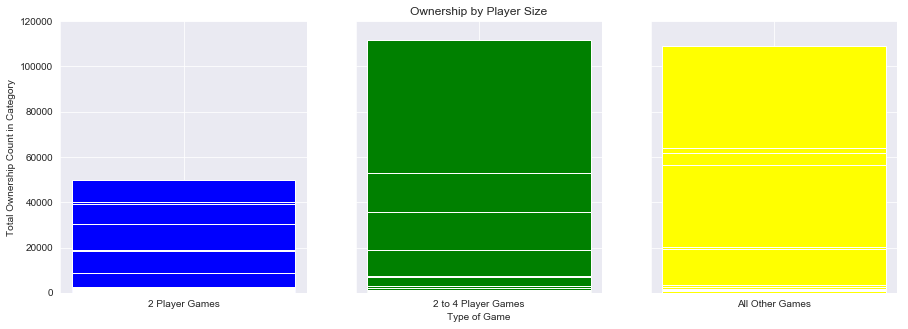

In [157]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.bar(x=['2 Player Games'],
       height=twopplgame.owned,
       color=('blue'))
plt.ylabel('Total Ownership Count in Category')
plt.ylim(0,120000)

plt.subplot(1,3,2)
plt.bar(x=['2 to 4 Player Games'],
       height=twotofourpplgame.owned,
       color=('green'))
plt.title('Ownership by Player Size')
plt.xlabel('Type of Game')
plt.tick_params(
    axis='y',         
    labelleft=False)
plt.ylim(0,120000)

plt.subplot(1,3,3)
plt.bar(x=['All Other Games'],
       height=otherpplgame.owned,
       color=('yellow'))
plt.tick_params(
    axis='y',         
    labelleft=False)
plt.ylim(0,120000)

plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\axes\_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


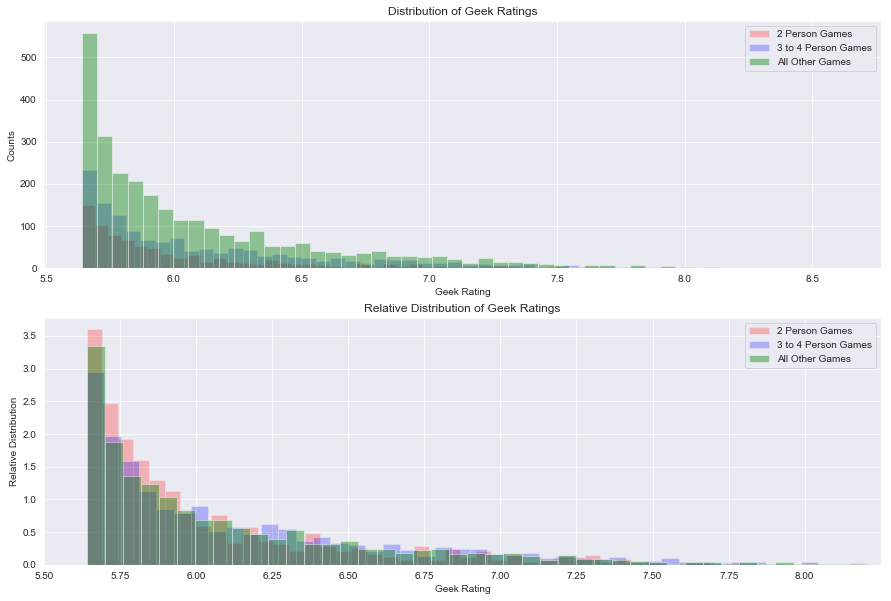

In [72]:
# Now Analyzing Distribution Densities by Player Number Classification

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.hist(x=twopplgame['geek_rating'], alpha=0.25, color='red', bins=50)
plt.hist(x=threetofourpplgame['geek_rating'], alpha=0.25, color='blue', bins=50)
plt.hist(x=otherpplgame['geek_rating'], alpha=0.4, color='green', bins=50)
plt.legend(['2 Person Games', '3 to 4 Person Games', 'All Other Games'])
plt.title('Distribution of Geek Ratings')
plt.xlabel('Geek Rating')
plt.ylabel('Counts')
ax2.xaxis.set_ticks(np.arange(5.5, 8.5, 0.25))

plt.subplot(2,1,2)
plt.hist(x=twopplgame['geek_rating'], alpha=0.25, color='red', bins=50, normed=True)
plt.hist(x=threetofourpplgame['geek_rating'], alpha=0.25, color='blue', bins=50, normed=True)
plt.hist(x=otherpplgame['geek_rating'], alpha=0.4, color='green', bins=50, normed=True)
plt.legend(['2 Person Games', '3 to 4 Person Games', 'All Other Games'])
plt.title('Relative Distribution of Geek Ratings')
plt.xlabel('Geek Rating')
plt.ylabel('Relative Distribution')
plt.xlim(5.5, 8.25)
plt.xticks(np.arange(5.5, 8.25, 0.25))



plt.show()

In [36]:
# Calculating Top Games by Player Number Classification

max2name = twopplgame.loc[twopplgame.geek_rating.idxmax(), 'names']
max2num = twopplgame.geek_rating.max()

max3to4name = threetofourpplgame.loc[threetofourpplgame.geek_rating.idxmax(), 'names']
max3to4num = threetofourpplgame.geek_rating.max()

maxothername = otherpplgame.loc[otherpplgame.geek_rating.idxmax(), 'names']
maxothernum = otherpplgame.geek_rating.max()

#Instead of trying to create variables for rank, I just looked at the csv (which is ordered by rank)
# Much faster to add a string number into the dataframe

arraymaxplayer = np.array([['All Other Games', maxothername, '2017', maxothernum, '1'],
                           ['3 to 4 Players', max3to4name, '2015', max3to4num, '2'],
                           ['Two Players Only', max2name, '2005', max2num, '5']])

dfmaxplayer = pd.DataFrame(arraymaxplayer)
dfmaxplayer.columns = ['Player Counts', 'Top Game', 'Year', 'Geek Rating', 'Overall Rank']


dfmaxplayer

,Player Counts,Top Game,Year,Geek Rating,Overall Rank
0,All Other Games,Gloomhaven,2017,8.61858,1
1,3 to 4 Players,Pandemic Legacy: Season 1,2015,8.50163,2
2,Two Players Only,Twilight Struggle,2005,8.19787,5


### Analysis - Player Counts 

Even though there are vastly more games designed for 2 players and 2-4 players than any other type, it appears that there is __no apparent correlation__ between how good a board game is and the player size that the game supports. Differences found within the Geek Rating histogram, the bar plots, and the boxplots all are within 0.5 points. This suggests that games that are for 2 players or for 2-4 players are __not__ created because they're popular and therefore publishers create games specifically for those sizes. Therefore, another reason must exist to explain why there are so many 2 player and 2-4 player games out there. Perhaps it is simply easier for game developers to create games that can accommodate this number of players and not more. More analysis would be required to reach a conclusion. <br>

On another note, this is the first time we observe that for the top 5000 games listed on BGG, __no game is rated below 5.5.__ Whatever algorithm is used to create the standardized "Geek Rating," it pushes the mean closer to 5.75-6.0 instead of the intuitive 5.0 out of 10. While this may skew the grading somewhat, it does not systematically bias the data; the scoring algorithm is applied to all the games, and so the scoring is simply shifted slightly higher. It's also noted that the highest ranked game, Gloomhaven, does not even eclipse a rank of 9 out of 10. This suggests that small differences in ratings of games within this window of scoring - approximately 5.5 to 8.5 out of 10 - are actually significant. <br>

As a final point of analysis, we again see that the top games by player number category were made recently - all games were made in the last 15 years and two of the three in the last 5. <br>

When looking at ownership alone according to the pie chart, we see that two to four players games is approximately a third of the dataset. However, its total ownership quantity __compares to the all other game types category.__ On the other hand, the number of two player games in this dataset is about half of the number of two to four player games. When looking at the ownership quantities bar graph, the ownership total for two player games is also about half of that of two to four player games. Nonetheless, the fact that two to four player games are owned about as much as all non 2-to-4 and non 2 player games despite being found in the dataset 22% less than the all other games category suggests that there is no correlation between the intrinsic characteristic of player size and ownership. <br>

This is also the first time we see that a game's score does not correlate with its ownership. Despite the above observed trends of ownership, we see through the boxplots and the bar graphs that there is no observed difference in a games score and its player size. The boxplots show that the interquartile range for all three categories is less than one single point for all three categories. If there is no significant difference between player size and score but there is an approximate 50% drop in ownership for two player games versus all other games, we can conclude that something other than player size is affecting ownership. Let's take a look at the second intrinsic characteristic - the average time to play a board game.

## Analysis 4. Average Time to Play Board Game

Does how long a board game takes to play on average indicate how good a board game is?

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x720 with 0 Axes>

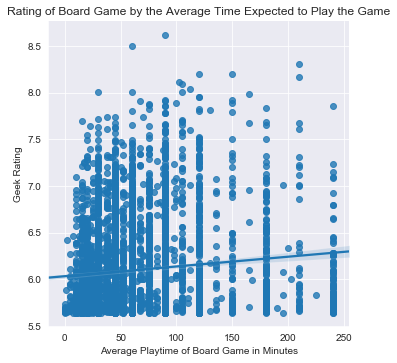

Average Times are defined by a combination of the expected play time by the game's developers and reported min and max play times of BGG Users.


In [81]:
# ANALYSIS 4: Geek Rating by Average Time to Play the Board Game
plt.figure(figsize=(15,10))

sns.lmplot(x='avg_time', y='geek_rating', data=dfsubset)
plt.title('Rating of Board Game by the Average Time Expected to Play the Game')
plt.xlabel('Average Playtime of Board Game in Minutes')
plt.ylabel('Geek Rating')


plt.show()

BOLD = '\033[1m'
print(BOLD + 'Average Times are defined by a combination of the expected play time by the game\'s developers \
and reported min and max play times of BGG Users.')

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


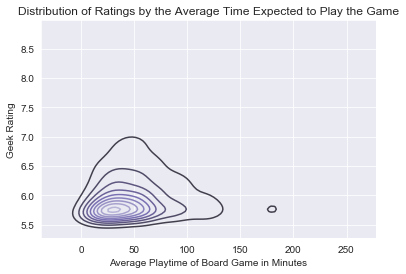

In [43]:
# Average Time Distribution

dfsubsetkde = dfsubset[['avg_time', 'geek_rating']].copy()
ax = sns.kdeplot(data=dfsubsetkde, cmap='Purples_d')
plt.title('Distribution of Ratings by the Average Time Expected to Play the Game')
plt.xlabel('Average Playtime of Board Game in Minutes')
plt.ylabel('Geek Rating')

plt.show()

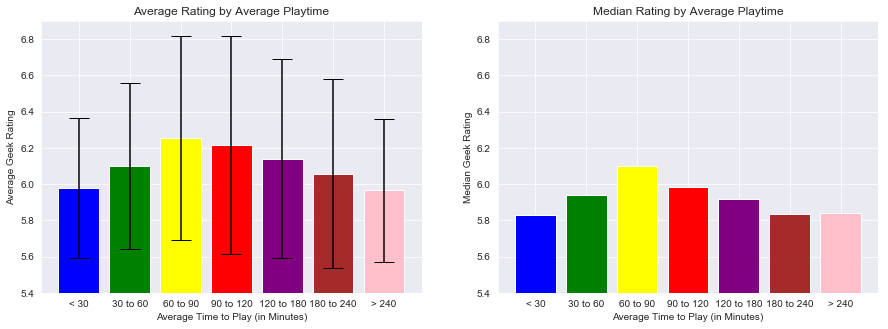

In [77]:
# separating this category into intervals

df0to30 = df[df.avg_time <= 30]
df30to60 = df[(df.avg_time > 30) & (df.avg_time <= 60)]
df60to90 = df[(df.avg_time > 60) & (df.avg_time <= 90)]
df90to120 = df[(df.avg_time > 90) & (df.avg_time <= 120)]
df120to180 = df[(df.avg_time > 120) & (df.avg_time <= 180)]
df180to240 = df[(df.avg_time > 180) & (df.avg_time <= 240)] 
df240plus = df[df.avg_time > 240]

timeintervalavg = [df0to30.geek_rating.mean(), df30to60.geek_rating.mean(),\
                   df60to90.geek_rating.mean(), df90to120.geek_rating.mean(), \
                   df120to180.geek_rating.mean(), df180to240.geek_rating.mean(), \
                   df240plus.geek_rating.mean()]

timeintervalstd = [df0to30.geek_rating.std(), df30to60.geek_rating.std(),\
                   df60to90.geek_rating.std(), df90to120.geek_rating.std(), \
                   df120to180.geek_rating.std(), df180to240.geek_rating.std(), \
                   df240plus.geek_rating.std()]

timeintervalmedian = [df0to30.geek_rating.median(), df30to60.geek_rating.median(),\
                   df60to90.geek_rating.median(), df90to120.geek_rating.median(), \
                   df120to180.geek_rating.median(), df180to240.geek_rating.median(), \
                   df240plus.geek_rating.median()]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x=['< 30', '30 to 60', '60 to 90', '90 to 120', '120 to 180', '180 to 240', '> 240'], 
                 height=timeintervalavg, 
                 yerr=timeintervalstd, capsize=10,
       color=('blue', 'green', 'yellow', 'red', 'purple', 'brown', 'pink'))
plt.ylim(5.4, 6.9)
plt.ylabel('Average Geek Rating')
plt.xlabel('Average Time to Play (in Minutes)')
plt.title('Average Rating by Average Playtime')

plt.subplot(1,2,2)
plt.bar(x=['< 30', '30 to 60', '60 to 90', '90 to 120', '120 to 180', '180 to 240', '> 240'], 
                 height=timeintervalmedian, 
                 color=('blue', 'green', 'yellow', 'red', 'purple', 'brown', 'pink'))
plt.ylim(5.4, 6.9)
plt.ylabel('Median Geek Rating')
plt.xlabel('Average Time to Play (in Minutes)')
plt.title('Median Rating by Average Playtime')



plt.show()

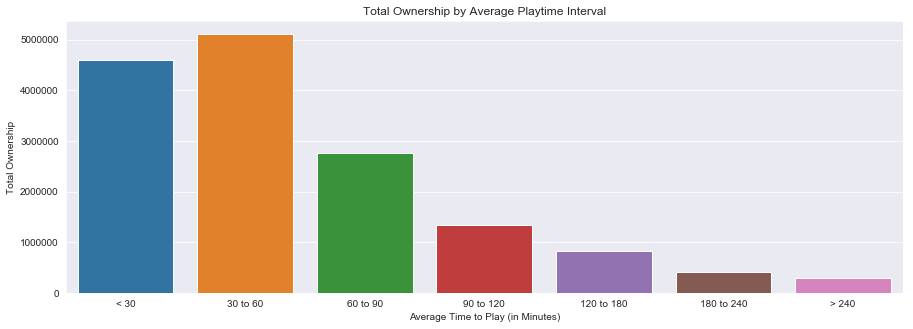

In [79]:
timeintervalownedtotal = [df0to30.owned.sum(), df30to60.owned.sum(), \
                        df60to90.owned.sum(), df90to120.owned.sum(), df120to180.owned.sum(),\
                         df180to240.owned.sum(), df240plus.owned.sum()]

plt.figure(figsize=(15,5)) 
ax = sns.barplot(x=['< 30', '30 to 60', '60 to 90', '90 to 120', '120 to 180', '180 to 240', '> 240'], 
                 y=timeintervalownedtotal)
plt.ylabel('Total Ownership')
plt.xlabel('Average Time to Play (in Minutes)')
plt.title('Total Ownership by Average Playtime Interval')

plt.show()

### Analysis - Average Playtime

As shown by the scatterplot and the above bar graph, the vast majority of the games can be played on average in under an hour. However according to the average and median bar graphs, the __highest scoring games actually range from 1 to 2 hours and not under 1 hour__ (as a point of clarity, the lower limit is _not_ inclusive but the upper limit is inclusive, so games that last exactly one hour is in the "30 to 60" minute category). <br>

The fact that the vast majority of games are actually shorter than the highest scoring ones suggests that __the average playtime is _not_ a causal factor for a board game's score.__ Perhaps board games can be analogized to famous books: George Orwell's _Animal Farm_ is about 110 pages long and James Joyce's _Ulysses_ is 730 pages long, but both are considered literary classics. It is the writing, not the length, that makes a book good. Apparently, board games are no different. <br>

Aside from English literature academics, I suspect, however, that most readers would prefer Orwell over _Ulysses_, a book __[consistently rated one of the most difficult books of all time](https://www.goodreads.com/list/show/827.Most_Difficult_Novels)__. Let's see in the next analysis if the complexity of a game factors into a game's rating.

## Analysis 5. The Complexity ("Weight") of Games

Does the level of complexity a board game has affect its rating?

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

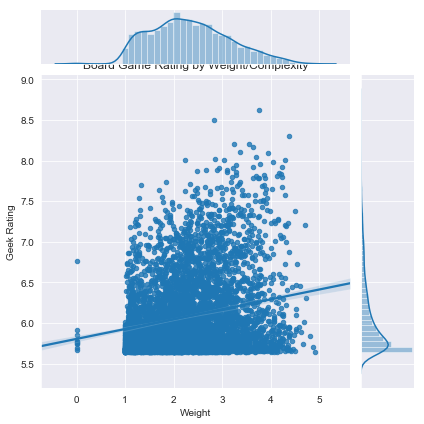

In [171]:
########### ANALYSIS 5 1/3: Rating by Weight

plt.figure(figsize=(15,5))
sns.jointplot(x='weight', y='geek_rating', data=df, kind='reg', scatter_kws={"s": 20})
plt.title('Board Game Rating by Weight/Complexity')
plt.xlabel('Weight')
plt.ylabel('Geek Rating')

plt.show()

As a quick point of analysis: We see via the histogram at the top of this graph that most games fall within the 1 to 3 weight range. Intuitively, this makes sense: most designers can create relatively straightforward games, but it is much more difficult to create complex games with a lot of moving parts (and therefore there are less of them).

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


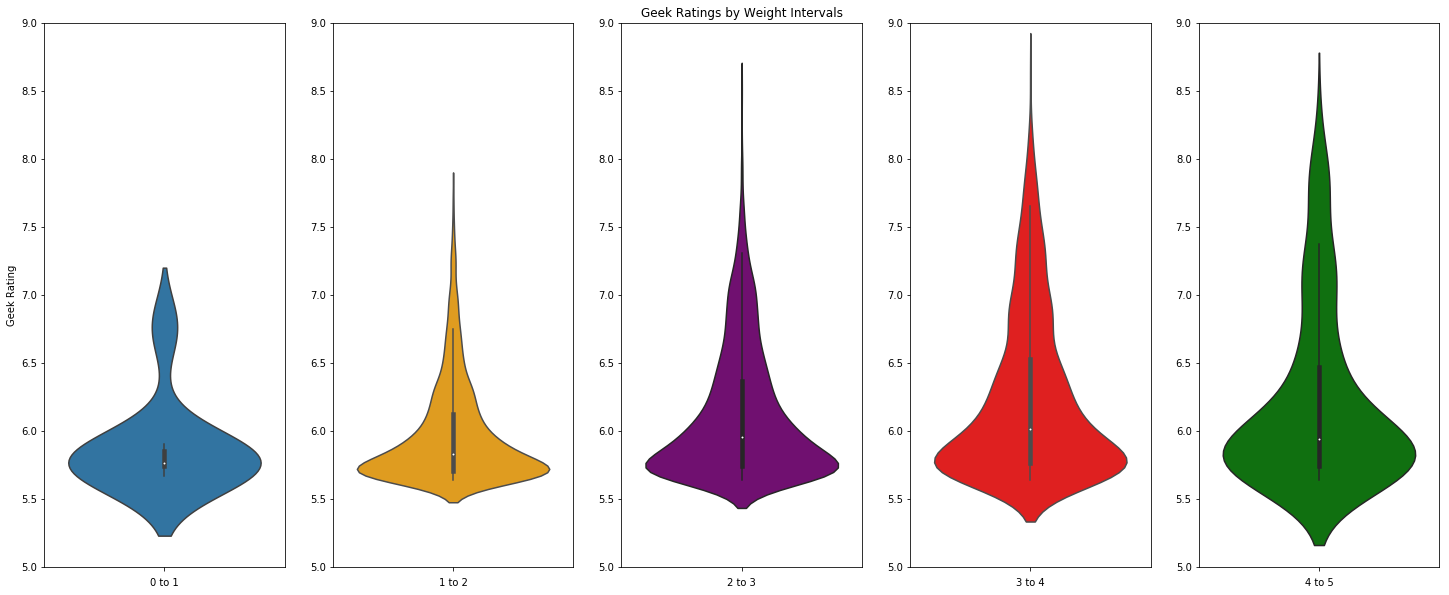

In [10]:
# Do a violin plot, ***somehow*** separating the violins into five groups by weight:
dfweight0to1 = df[df['weight'] < 1]
dfweight1to2 = df[(df['weight'] >= 1) & (df['weight'] <= 2)]
dfweight2to3 = df[(df['weight'] > 2) & (df['weight'] <= 3)]
dfweight3to4 = df[(df['weight'] > 3) & (df['weight'] <= 4)]
dfweight4to5 = df[(df['weight'] > 4)]

# My cheating method for putting the violins side-by-side: creating five subplots!

plt.figure(figsize=(25,10))

ax1 = plt.subplot(1,5,1)
sns.violinplot(y=dfweight0to1.geek_rating)
plt.ylabel('Geek Rating')
plt.xlabel('0 to 1')
plt.ylim(5, 9)

ax2 = plt.subplot(1,5,2)
sns.violinplot(y=dfweight1to2.geek_rating, color='orange')
plt.xlabel('1 to 2')
plt.ylabel(' ')
plt.ylim(5, 9)

ax3 = plt.subplot(1,5,3)
sns.violinplot(y=dfweight2to3.geek_rating, color='purple')
plt.xlabel('2 to 3')
plt.ylabel(' ')
plt.title('Geek Ratings by Weight Intervals')
plt.ylim(5, 9)

ax4 = plt.subplot(1,5,4)
sns.violinplot(y=dfweight3to4.geek_rating, color='red')
plt.xlabel('3 to 4')
plt.ylabel(' ')
plt.ylim(5, 9)

ax5 = plt.subplot(1,5,5)
sns.violinplot(y=dfweight4to5.geek_rating, color='green')
plt.xlabel('4 to 5')
plt.ylabel(' ')
plt.ylim(5, 9)


plt.show()

In [47]:
# creating intervals involving weight and rating averages

dfweightintervalmean = np.array([[dfweight0.weight.mean(), dfweight0.geek_rating.mean(), dfweight0.geek_rating.std()], 
                                 [dfweight1.weight.mean(), dfweight1.geek_rating.mean(), dfweight1.geek_rating.std()],
                                  [dfweight1half.weight.mean(), dfweight1half.geek_rating.mean(), dfweight1half.geek_rating.std()],
                                  [dfweight2.weight.mean(), dfweight2.geek_rating.mean(), dfweight2.geek_rating.std()],
                                  [dfweight2half.weight.mean(), dfweight2half.geek_rating.mean(), dfweight2half.geek_rating.std()],
                                  [dfweight3.weight.mean(), dfweight3.geek_rating.mean(), dfweight3.geek_rating.std()],
                                  [dfweight3half.weight.mean(), dfweight3half.geek_rating.mean(), dfweight3half.geek_rating.std()],
                                  [dfweight4.weight.mean(), dfweight4.geek_rating.mean(), dfweight4.geek_rating.std()],
                                  [dfweight4half.weight.mean(), dfweight4half.geek_rating.mean(), dfweight4half.geek_rating.std()],
                                  [dfweight5.weight.mean(), dfweight5.geek_rating.mean(), dfweight5.geek_rating.std()]])

dfweightintervalmean = pd.DataFrame(dfweightintervalmean)
dfweightintervalmean.columns = ('Weight Average', 'Geek Rating Average', 'Geek Deviation')

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


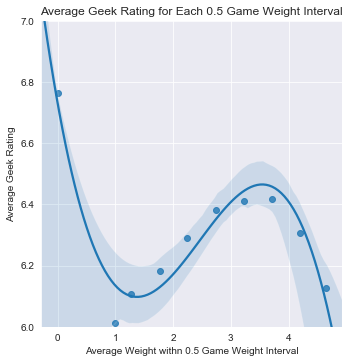

In [56]:
# graphing the previously created DataFrame

ax = sns.lmplot(x='Weight Average', y='Geek Rating Average', data=dfweightintervalmean, order=3)

plt.title('Average Geek Rating for Each 0.5 Game Weight Interval')
plt.xlabel('Average Weight withn 0.5 Game Weight Interval')
plt.ylabel('Average Geek Rating')
plt.ylim(6, 7)


plt.show()

### Analysis (1/3) - Weight

According to the regression line in the scatterplot, there is indeed a modest increase in a board game's rating when a game becomes more complex. However, the increase continues up until a weight rating of 4 out of 5; games with weight ratings above 4 dip down a bit in scoring. This makes intuitive sense: games that are incredibly convoluted won't be the most fun and fulfilling games. <br>

The above graph clearly explains this relationship between weight and score: __when games are more complex, they tend to be higher scoring (i.e., "better") games...up until a certain point.__ While it is reiterated that small differences in the critical scoring range of 5.5 to 9 are significant, it is nonetheless important to note that this "correlation's" y-axis range of the above graph spans only a single point (from 6 to 7). <br>

The reason for this correlation is likely because games with no challenge or strategy tend to bore gamers, and as stated before, games with too much strategy and convolution also would not be fun. Games weighted 0 must be in a special category: games that are _intended_ to be short, silly, easy, and accessible achieve those aims. More importantly, there are only nine (9) datapoints with a Weight of < 0.5 (via checking len(dfweight0to1)), and so this small sample set suggests that the high score on the above graph for 0 point games is not very reliable.  <br>

A key point to make when looking at the scatterplot and violin plots is that there is a stronger correlation between weight and rating for the top games (i.e., the top area of the violin plots is pushed farther upwards). <br>

Below is a further investigation of this correlation by looking at games with higher ratings.

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1800x360 with 0 Axes>

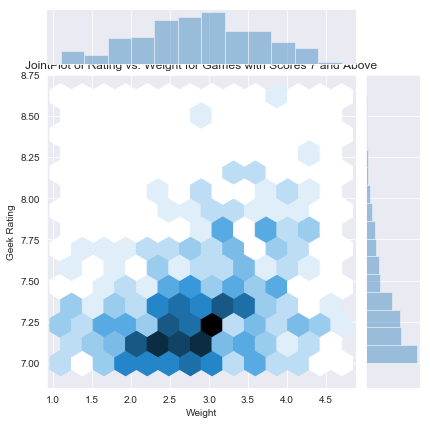

In [86]:
# Is this different for higher scoring games? - Analysis Weight 5 2/3 - Top Games

zoomedgeekrating = df[df.geek_rating >= 7]

plt.figure(figsize=(25,5))
ax = sns.jointplot(x='weight', y='geek_rating', data=zoomedgeekrating, kind='hex')
ax.ax_joint.set_xlabel('Weight')
ax.ax_joint.set_ylabel('Geek Rating')
ax.ax_joint.set_title('JointPlot of Rating vs. Weight for Games with Scores 7 and Above')
plt.ylim(6.85, 8.75)

plt.show()

In [119]:
# Top Games by Weight Category

dfweight0 = df[df.weight == 0].groupby('weight').geek_rating.max().reset_index()
#dfweight0['Name'] = dfweight0.loc[df.geek_rating.max(), 'names']

dfweight1 = df[(df.weight > 0) & (df.weight <=1)].groupby('weight').geek_rating.max().reset_index()
dfweight1 = dfweight1.sort_values(by=['geek_rating'])

dfweight1half = df[(df.weight > 1) & (df.weight <=1.5)].groupby('weight').geek_rating.max().reset_index()
dfweight1half = dfweight1half.sort_values(by=['geek_rating'])

#dfweight1half['Name'] = dfsubset.loc[dfsubset.groupby('year').geek_rating.max(), 'names']

dfweight2 = df[(df.weight > 1.5) & (df.weight <=2)].groupby('weight').geek_rating.max().reset_index()
dfweight2 = dfweight2.sort_values(by=['geek_rating'])
#dfmaxbyyear['Name'] = dfsubset.loc[dfsubset.groupby('year').geek_rating.max(), 'names']

dfweight2half = df[(df.weight > 2) & (df.weight <=2.5)].groupby('weight').geek_rating.max().reset_index()
dfweight2half = dfweight2half.sort_values(by=['geek_rating'])
#dfmaxbyyear['Name'] = dfsubset.loc[dfsubset.groupby('year').geek_rating.max(), 'names']

dfweight3 = df[(df.weight > 2.5) & (df.weight <=3)].groupby('weight').geek_rating.max().reset_index()
dfweight3 = dfweight3.sort_values(by=['geek_rating'])
#dfmaxbyyear['Name'] = dfsubset.loc[dfsubset.groupby('year').geek_rating.max(), 'names']

dfweight3half = df[(df.weight > 3) & (df.weight <=3.5)].groupby('weight').geek_rating.max().reset_index()
dfweight3half = dfweight3half.sort_values(by=['geek_rating'])
#dfmaxbyyear['Name'] = dfsubset.loc[dfsubset.groupby('year').geek_rating.max(), 'names']

dfweight4 = df[(df.weight > 3.5) & (df.weight <=4)].groupby('weight').geek_rating.max().reset_index()
dfweight4 = dfweight4.sort_values(by=['geek_rating'])
#dfmaxbyyear['Name'] = dfsubset.loc[dfsubset.groupby('year').geek_rating.max(), 'names']

dfweight4half = df[(df.weight > 4) & (df.weight <=4.5)].groupby('weight').geek_rating.max().reset_index()
dfweight4half = dfweight4half.sort_values(by=['geek_rating'])
#dfmaxbyyear['Name'] = dfsubset.loc[dfsubset.groupby('year').geek_rating.max(), 'names']

dfweight5 = df[df.weight > 4.5].groupby('weight').geek_rating.max().reset_index()
dfweight5 = dfweight5.sort_values(by=['geek_rating'])

dfweightintervals = pd.concat([dfweight0.tail(1), dfweight1.tail(1), dfweight1half.tail(1), dfweight2.tail(1), \
                               dfweight2half.tail(1), \
                               dfweight3.tail(1), dfweight3half.tail(1), dfweight4.tail(1), \
                               dfweight4half.tail(1), dfweight5.tail(1)])

# REALLY WANT TO INCLUDE TOP GAME NAMES FOR THIS DATAFRAME - see below!
dfweightintervals = dfweightintervals.sort_values(by=['weight'], ascending=False)

# Still running into incorporating name column problem - 
# cheated by looking up the ten values (but I figured out this problem by the rating by year analysis)
dfweightintervals['Game Name'] = ['Advanced Squad Leader', 'Through the Ages: A New Story of Civilization', \
                                 'Gloomhaven', 'Terraforming Mars', 'Pandemic Legacy: Season 1', \
                                 '7 Wonders Duel', 'Azul', 'Codenames', 'Telestrations After Dark', \
                                 'Antike']
dfweightintervals['Year'] = ['1985', '2015', '2017', '2016', '2015', '2015', '2017', '2015', '2015', '2005']
dfweightintervals.rename(columns={'weight': 'Weight', 'geek_rating': 'Geek Rating'}, inplace=True)


dfweightintervals

,Weight,Geek Rating,Game Name,Year
11,4.7030,7.20045,Advanced Squad Leader,1985
98,4.3678,8.30183,Through the Ages: A New Story of Civilization,2015
145,3.7543,8.61858,Gloomhaven,2017
234,3.2456,8.19914,Terraforming Mars,2016
385,2.8210,8.50163,Pandemic Legacy: Season 1,2015
284,2.2307,8.00627,7 Wonders Duel,2015
344,1.8458,7.73689,Azul,2017
289,1.3303,7.69843,Codenames,2015
0,1.0000,6.01236,Telestrations After Dark,2015
0,0.0000,6.76315,Antike,2005


c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


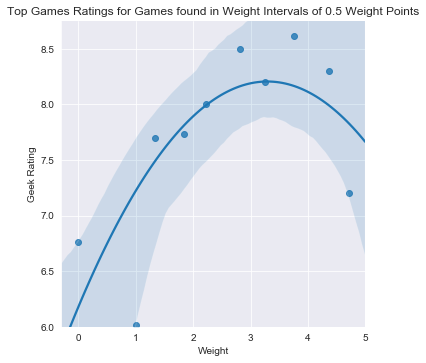

In [121]:
# Scatter graph of top rated games by weight
sns.lmplot(x='Weight', y='Geek Rating', data=dfweightintervals, order=2)
plt.title('Top Games Ratings for Games found in Weight Intervals of 0.5 Weight Points')
plt.xlabel('Weight')
plt.ylabel('Geek Rating')
plt.ylim(6, 8.75)
plt.show()
        

### Analysis (2/3) - Weight for Top Rated Games

When looking at the above graph, there appears to be a more direct and linear relationship between a game's weight and its score (the graph's regression line was set to parabolic to account for the dip in 4 to 5 out of 5.0 weight interval). At the very least, it reinforces the conclusion in the previous section, which is that __a correlation between weight and rating _does_ exist__, and this positive correlation holds true up until a certain point where games become too complex for general enjoyment. <br>

When looking at the Table of the Top Rated Games by Weight Intervals, we yet again see that recent games are topping the charts: __out of ten weight intervals, 8 out of the 10 top games were published in the _last five years.___ Future analysis would require comparing the higher weighted games in recent years to lower rated games in recent years. If higher rated games were indeed higher in recent years, then this would support that the weight - not the recency - would be the causal factor of how good a game is.

Now that there is a clear correlation between a game's weight and its score, does this translate to a correlation between a game's weight and the number of times the game is purchased? We check this for both overall games and most frequently owned games.

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


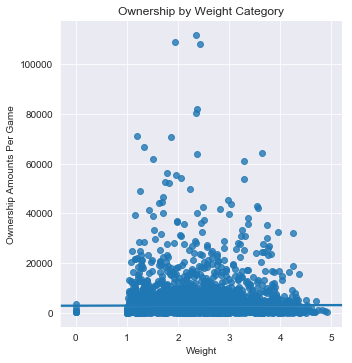

In [122]:
# Analysis 5 3/3 - Does weight and ownership correlate?

sns.lmplot(x='weight', y='owned', data=df)
plt.title('Ownership by Weight Category')
plt.xlabel('Weight')
plt.ylabel('Ownership Amounts Per Game')
#plt.ylim(6, 8.75)
plt.show()
        

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


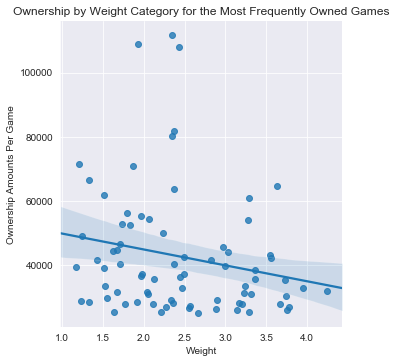

In [125]:
# Looking at 25,000+ owned

dfweight25000 = df[df.owned >25000]
sns.lmplot(x='weight', y='owned', data=dfweight25000)
plt.title('Ownership by Weight Category for the Most Frequently Owned Games')
plt.xlabel('Weight')
plt.ylabel('Ownership Amounts Per Game')
#plt.ylim(6, 8.75)
plt.show()

### Analysis (3/3) Weight vs. Ownership

Despite a clear correlation between a game's score and its weight, this did not equate to ownership following the same trend. In fact, looking at the most frequently owned games, we see a _negative_ correlation with ownership and increasing game complexity. This is another clear, albeit not definitive, example that __a game's score must _not_ be tied to how much that game is purchased.__

Still, when looking at the top rated games by weight table, we yet again see that the top rated games were also published in recent years. We take a closer look at _when_ a game was published to see why publishing timing factors into higher ownership.

## Analysis 6. Rating by Year

What is the distribution of board game ratings when compared to the publishing year of the games?

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


The average Geek Rating for 1969 to 1999 is 5.974932940430925 +/- 0.37207537355359666.


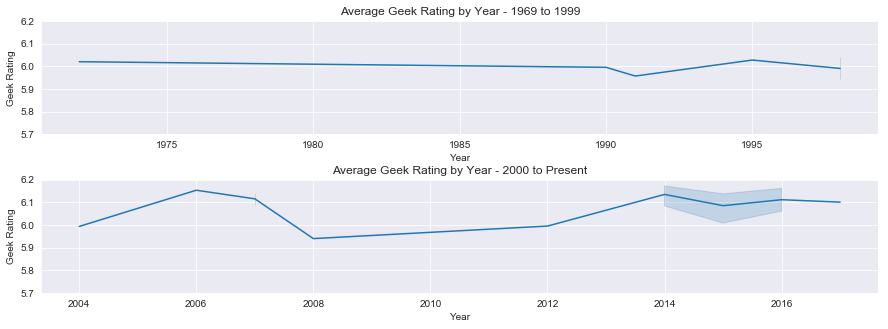

The average Geek Rating for 2000 to Present is 6.112616170109357 +/- 0.5002893380365003.


In [60]:
# ANALYSIS 6: RATING BY YEAR!!!!

plt.figure(figsize=(15,5))

contemporaryera = df[(df.year > 1969) & (df.year < 2000)]
modernera = df[df.year > 1999]

ratingbyyearcontemporary = contemporaryera.groupby('year').geek_rating.mean()
ratingbyyearmodern = modernera.groupby('year').geek_rating.mean()

plt.subplot(2,1,1)
sns.lineplot(x=contemporaryera.year, y=ratingbyyearcontemporary)
plt.xlabel('Year')
plt.ylabel('Geek Rating')
plt.title('Average Geek Rating by Year - 1969 to 1999')
plt.ylim(5.70, 6.2)
plt.subplots_adjust(hspace=0.4)
sns.set_style('darkgrid')

print("The average Geek Rating for 1969 to 1999 is {} +/- {}.".format(contemporaryera.geek_rating.mean(), contemporaryera.geek_rating.std()))

plt.subplot(2,1,2)
sns.lineplot(x=modernera.year, y=ratingbyyearmodern)
plt.xlabel('Year')
plt.ylabel('Geek Rating')
plt.title('Average Geek Rating by Year - 2000 to Present')
plt.ylim(5.70, 6.2)
sns.set_style('darkgrid')


plt.show()
print("The average Geek Rating for 2000 to Present is {} +/- {}.".format(modernera.geek_rating.mean(), modernera.geek_rating.std()))

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


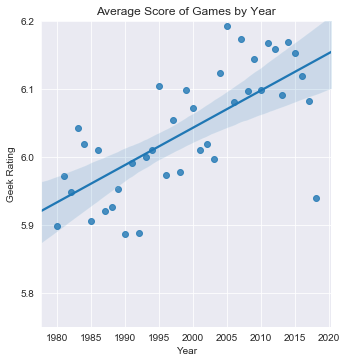

In [161]:
dfavgbyyear = dfsubset.groupby('year').geek_rating.mean().reset_index()


sns.lmplot(x='year', y='geek_rating', data=dfavgbyyear)
plt.title('Average Score of Games by Year')

plt.xlabel('Year')
plt.ylabel('Geek Rating')
plt.ylim(5.75,6.20)

plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

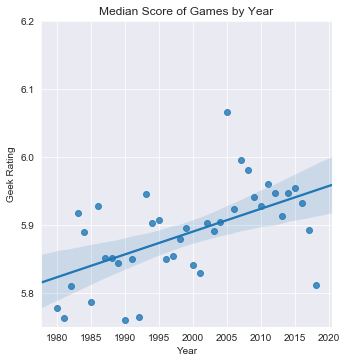

In [160]:

dfmedianbyyear = dfsubset.groupby('year').geek_rating.median().reset_index()

plt.figure(figsize=(15,5))
ax = sns.lmplot(x='year', y='geek_rating', data=dfmedianbyyear)
plt.title('Median Score of Games by Year')
plt.xlabel('Year')
plt.ylabel('Geek Rating')
plt.ylim(5.75,6.20)


plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1800x720 with 0 Axes>

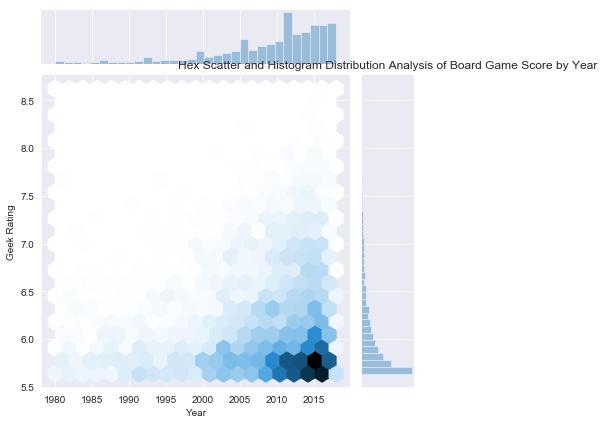

In [161]:
plt.figure(figsize=(25,10))
ax = sns.jointplot(x='year', y='geek_rating', data=dfhigherscore, kind='hex', 
              gridsize=20)

plt.title('Hex Scatter and Histogram Distribution Analysis of Board Game Score by Year')
ax.ax_joint.set_xlabel('Year')
ax.ax_joint.set_ylabel('Geek Rating')

plt.show()

### Analysis (1/2) Rating by Year

The regression lines on the above scatter plots show that there is a correlation between a game's rating and the year it was published - more recent games are scored higher. While this is true, the differences in the y-axis are minute; as shown in the "average score by year" scattergraph, the difference between the lowest and the highest points is approximately 0.3 points. <br>

As already shown in previous histograms, the joint hexplot shows that many more games were made in the last 10 years. Because the majority of games hover in that 5.5-6 out of 10 range, a large quantity of games in recent years will keep the average low and the median lower. This likely explains only a modest positive correlation. If we focus on the highest scoring games, we see a much more significant correlation.

In [162]:
# Analysis 6.5 - Top Rated Games by Year

# Top Games by Year Table

dfmaxbyyear1 = dfsubset[['year', 'names', 'geek_rating']].copy()
dfmaxbyyear2 = dfsubset.groupby('year').geek_rating.max().reset_index()

dfmaxbyyear = pd.merge(dfmaxbyyear1, dfmaxbyyear2)
dfmaxbyyear.rename(columns={'year': 'Year', 'geek_rating': 'Geek Rating', 'names': 'Name'}, inplace=True)
dfmaxbyyear = dfmaxbyyear.sort_values(by=(['Year']), ascending=False)

print(BOLD + 'Top Games by their Year of the Last 20 Years are:')
dfmaxbyyear.head(20)

Top Games by their Year of the Last 20 Years are:


,Year,Name,Geek Rating
14,2018,Rising Sun,7.65202
0,2017,Gloomhaven,8.61858
2,2016,Terraforming Mars,8.19914
1,2015,Pandemic Legacy: Season 1,8.50163
9,2014,Star Wars: Imperial Assault,7.85376
6,2013,Caverna: The Cave Farmers,7.95343
4,2012,Terra Mystica,8.09296
5,2011,The Castles of Burgundy,8.00679
13,2010,7 Wonders,7.71364
16,2009,Dominion: Intrigue,7.63396


c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


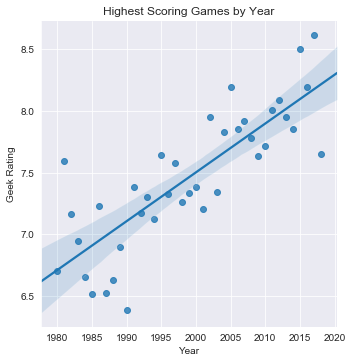

In [65]:
# Graphical Output of the Above

sns.lmplot(x='Year', y='Geek Rating', data=dfmaxbyyear)
plt.title('Highest Scoring Games by Year')
plt.xlabel('Year')
plt.ylabel('Geek Rating')

plt.show()


### Analysis (2/2) Rating by Year - Looking at The Top Games by Year

When looking at the top games by year, we see a more confident correlation with a significant point spread. This suggests that the flagship board game of the year has tended to be better than that of the previous year (with notable exception to the 1985-1990 period, which was outside a single standard deviation of the trend). <br>

As a point of bias, the reason for the signifcant drop in the 2018 year is simply due to this dataset being created before the year 2018 was up. This is shown by the first Rating by Year Scatter analysis found in this section and in the previous histogram distribution of games by year in Analysis 2; the amount of games in 2018 abruptly drops from 2017. <br>

## Analysis 7. Looking at Top 100 Games

With illuminating evidence that top games by year have a tight correlation, let's take a closer look at the top 100 games and see whether they have a different scoring pattern than the rest of the dataset.

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x360 with 0 Axes>

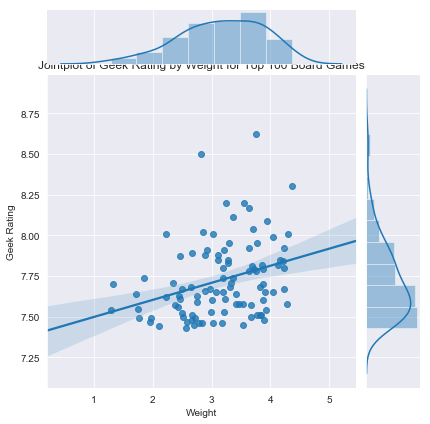

In [94]:
# ANALYSIS 7: Focusing on the Top 100 Games here

# Top 100 score by weight

top100 = df.round(2)
top100 = top100.head(100) # My way of creating the top 100 - it's already organized by rating and rank.

plt.figure(figsize=(15,5))
sns.jointplot(x='weight', y='geek_rating', data=top100, kind='reg')
plt.title('Jointplot of Geek Rating by Weight for Top 100 Board Games')
plt.xlabel('Weight')
plt.ylabel('Geek Rating')
plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


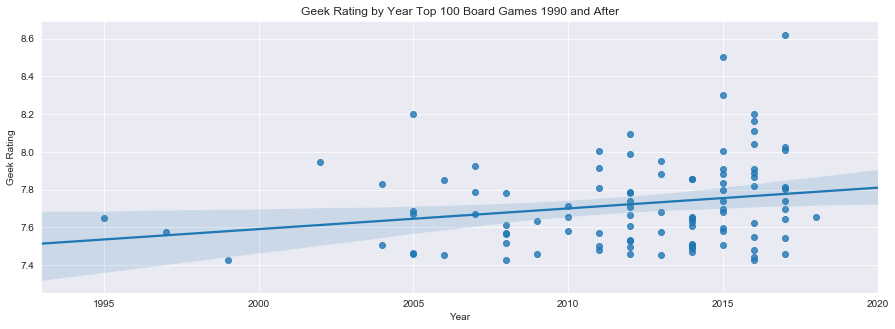

In [92]:
# Top 100 score by year

top100 = df[df.year > 1989] # again necessary because old games push the data to the side
top100 = top100.head(100) # already in order of ranking by rating

plt.figure(figsize=(15,5))
sns.regplot(x='year', y='geek_rating', data=top100)
plt.title('Geek Rating by Year Top 100 Board Games 1990 and After')
plt.xlabel('Year')
plt.ylabel('Geek Rating')

plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


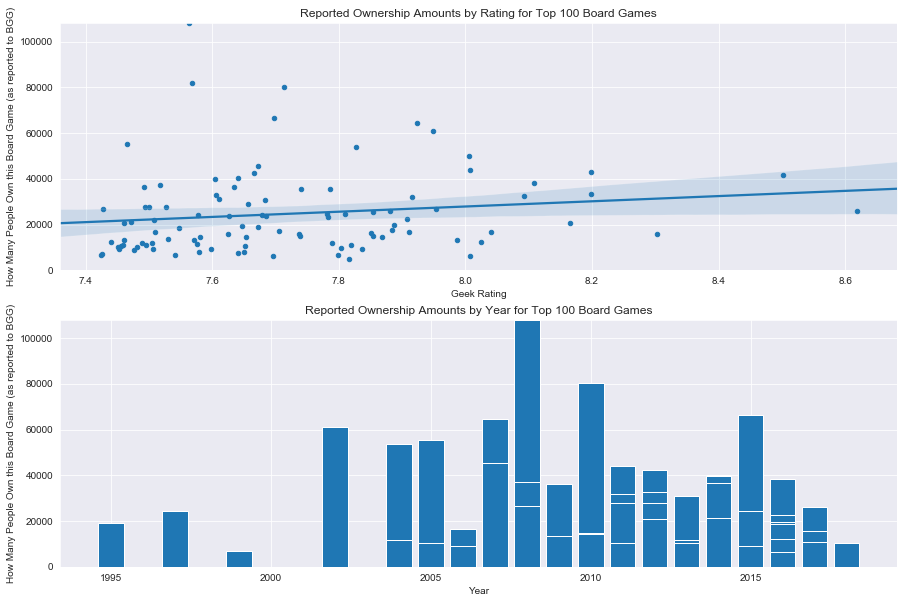

In [104]:
# reported ownership of top 100

top100 = df[df.year > 1989] # had to copy this because this cell refused to adopt this limit
top100 = top100.head(100)

plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.regplot(x='geek_rating', y='owned', data=top100, scatter_kws={"s": 20}, x_estimator=np.mean)

plt.title('Reported Ownership Amounts by Rating for Top 100 Board Games')
plt.xlabel('Geek Rating')
plt.ylim(0,108000)
plt.ylabel('How Many People Own this Board Game (as reported to BGG)')

plt.subplot(2,1,2)
plt.bar(x='year', height='owned', data=top100)

plt.title('Reported Ownership Amounts by Year for Top 100 Board Games')
plt.xlabel('Year')
plt.ylim(0,108000)
plt.ylabel('How Many People Own this Board Game (as reported to BGG)')
plt.show()

c:\users\jfonte\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


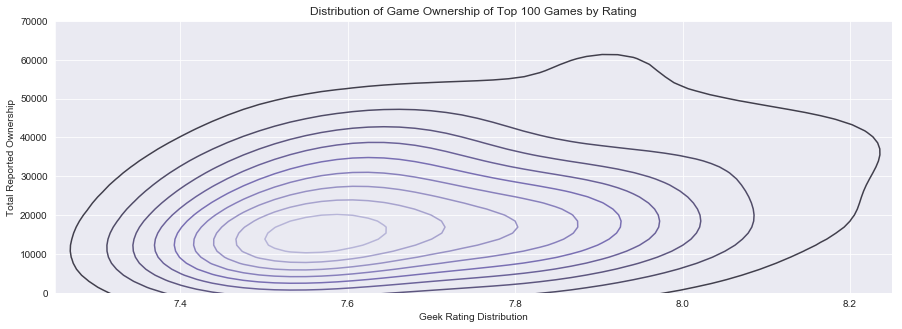

In [125]:
#ownership distribution

top100ownedkde = top100[['geek_rating', 'owned']].copy() 
# ^^^ necessary because kdeplot only takes dataframes - unable to specify columns within dataframe

plt.figure(figsize=(15,5))
ax = sns.kdeplot(data=top100ownedkde, cmap='Purples_d')
sns.set_style('darkgrid')
plt.title('Distribution of Game Ownership of Top 100 Games by Rating')
plt.xlabel('Geek Rating Distribution')
plt.ylabel('Total Reported Ownership')
plt.xlim(7.25,8.25)
plt.ylim(0,70000)

plt.show()

### Analysis - Top 100 Games

Throughout all of the above graphs, there is a consistent (albeit roughly approximated) __increase__ of a board game's rating across characteristics of weight and year for the top 100 games. If ownership increases with rating, as shown in Analysis 2 and again with the scatterplot graph above, and rating has increased mildly for games over the years and significantly for the top 100 over the years, then ownership should increase in more recent years, right? The above bar graph does not confidently support that claim; while overall board game ownership is higher now than it was before 2000, there is not a consistent upward trend of gaming ownership by year. Why? <br>

All that the top 100 correlations show is that the __really good/top__ games that people are choosing to buy are __getting better__, while the quality of the vast majority of games has stagnated. It does _not_ suggest that _because_ games are getting better, people are buying more games (although this is also a good time to reiterate the lack of accuracy in ownership numbers within this dataset). <br>

If the increased rating of recent games does not suggest increased purchasing of games in recent years, then there must be another reason for the increase in overall ownership. Possible explanations for this "other reason" is explained in the Conclusion section below.

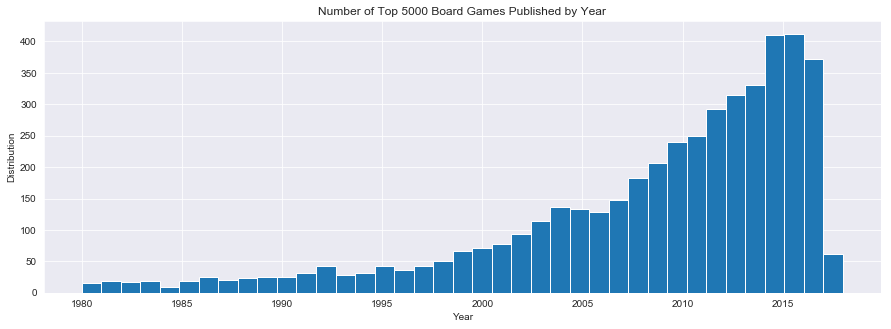

In [144]:
# To be Used Again as a final point for the conclusion.

plt.figure(figsize=(15,5))
plt.hist(x=dfsubset.year, bins=39)
plt.title('Number of Top 5000 Board Games Published by Year')
plt.xlabel('Year')
plt.ylabel('Distribution')

plt.show()

# <h3 align="center">__Conclusion__</h3>

## Answers to the Original Questions

1. Are board game sales indeed increasing? <br>
__YES. The average number of sales for a given board game has not changed significantly from previous decades, but there are vastly more board games published in recent years. The unchanged average number of sales per board game multiplied by a higher number of board games per year equates to higher sales overall per year.__ <br> <br>

2. Do board game sales correlate with a higher scoring (i.e., "better") board game? <br>
__NO. In instances where there is a correlation between a characteristic and a higher score, there appears to be no correlation between that characteristic and its ownership (e.g., Weight), and vice-versa (e.g., Average Time to Play Game and Player Size characteristics).__

__A more poignant example is the trend of increasing ratings by publishing year. Average number of sales per board game has stagnated over the years despite these increased ratings. There is an even steeper increase when looking at the Top 100 Games by year. Yet, when comparing Ownership by Rating graphs to Ownership by Year graphs, there does _not_ appear to be an overlap.__
<br> <br>

3. Which characteristics of recent board games, if any, have caused this change in board games sales? <br>
__There does NOT appear to be any intrinsic characteristics of board games that definitively correlate between ownership and the characteristic. There is, however, a remarkably smaller number of two-player games owned than any other game size. This alone is insufficient to conclude that the player size of a board game is the _cause_ of higher board game sales.__


## What we Saw

Out of the various trends analyzed above, three correlations were found: weight by score trend, modest increase correlation for score by year trend (games are getting better), and a more significant trend for top 100. All other characteristics did not show significant correlations, namely how good a board game is (i.e., its Geek Rating) and (1) the player count that the board game is designed for; (2) how many people reportedly own the game; and (3) the average time the board game is expected to be played in. <br>

With that said, we see that __more games are published every single year (as shown in the above histogram), and total ownership for games published in the last 20 years is significantly higher than before that time period.__ If it's not due to intrinsic characteristics of games being more popular/more owned, then why the higher ownership? <br>

## What this Means

In a more connected world, there is a greater access to board games (such as the advent of Amazon, instead of only being able to find board games at a local gaming store). Greater access means more ownership. While this explains a potential overall increase in ownership, this does not explain a significantly higher ownership count for games published in the _last 20 years when compared to their predecessors_; while undoubtedly more difficult to obtain than newer games, older games can still be purchased by vendors on the internet. So what accounts for higher ownership or more recently published games? <br>

A more connected world _also_ means that there are greater avenues _to develop_ board games (e.g., funding board games through crowdfunding websites). More opportunity for indie developers and a diversity of ideas and genres lead to a wide array of games on the market (with, of course, comparatively greater advertising for such games than in previous decades). This is distinct from the past, where only the minds of a handful of publishers created a small number of board games that catered to a particular target audience, again coupled with a smaller amount of direct marketing to such consumers. <br>

With more and more games of varying and distinct genres being developed, it is possible that there is a greater likelihood that at least one of these games will be favored by a larger audience. This will in turn cause a larger number of rating votes for a game on the BGG website, causing its overall Geek Rating to increase. Connecting this higher amount of games with (the modest) positive correlation of score by year, these top tier unicorns, a.k.a. the "really good games"  __are getting even better.__ Not surprisingly, those games seemed to be purchased the most, as shown by the Top Games by Year analysis. With really good games getting better, they mildly push the overall average scores by year up (specifically, by an overall average increase of ~ 0.3 points over the course of 40 years) but have a significantly smaller impact on the median score by year. We see that in Analysis 6 vs. Analysis 7, which supports this claim that the really good games are having an effect on this increased scoring trend. <br>

## Further Research

Even when accounting for outliers of really good games, __the increase of really good games does NOT explain why, overall, total ownership is increasing.__ It is apparent by this analysis that how "good" a game is likely __not__ the reason why board game ownership is increasing. Therefore, another reason must exist as to why people are purchasing and overall gravitating to board games during this so-called "Board Game Renaissance" time period. Perhaps it's solely for the reasons of higher access and more avenues to develop games, as described above. Maybe it is for another reason, such as more games being published of a particular genre. In order to definitively answer this question, more characteristics of board games will have to be analyzed, such as comparing ownership with every possible board game characteristic and check for correlations there. This includes characteristics not analyzed in this Capstone, such as Ownership vs. Game Genre, Game Mechanic, and Game Publisher. <br>

If no intrinsic characteristic is the reason for the increase in ownership, then only aforementioned external factors such as those describe above must be the reason. Ownership would have to be compared with key years that affected the board game market, such as the year when Amazon began selling board games and the year that crowdfunding websites such as Kickstarter began hosting board game funding. If there is a correlation between a user's total ownership and key dates, then that is a strong contender as the reason for this Renaissance.

## A Final Point of Bias

As stated before, the relevant range of scoring is about 5.5 to 9 out of 10 - not all of the range of the Geek Score was used. Board Game Geek.com's rating system is either seriously flawed...or the worst board game is only several degrees worse than the best board game. Indeed, the __[two worst board games listed on BGG](https://boardgamegeek.com/browse/boardgame?sort=rank&sortdir=desc)__ - Tic-Tac-Toe (circa 1200 BCE) and Chutes & Ladders (circa 200 BCE) - have ratings of 3.444 GR/2.61 AVGR and 3.536 GR/2.79 AVGR, respectively. As a point of comparison, the lowest scoring game on this dataset - the top 5000 board games - is Dragon Farkle (2015), with a rating of 5.640 GR/6.291 AVGR. <br>

This suggests that board games that are not that good are not that popular, and games that are not that popular may not be voted on as often. This results in insufficient rating data for BGG to apply its algorithm to create a formal Geek Rating and rank for all games. Therefore, the average and median rating scores are artificially inflated in this manner: games that are only afforded a Geek Rating and rank are ones that are popular enough to receive the requsite number of votes. <br>

This main point of bias along with the other points of biases identified throughout the Capstone Project, has been taken into consideration when drawing the above conclusions.

# Notes for the Review on this Project

You will notice that some of my graphical outputs are not perfect. As an endnote to this Capstone Project, I want to address this and other things that you may have noticed throughout this Project.

- I did not use plt.plot as, for whatever reason, it did not create any graphs for me. All other kinds of plots worked for me. <br><br>

- Because I did not use plt.plot, my go-to scatterplot was sns.lmplot. Unlike some other Seaborn graphs, sns.lmplot and sns.jointplot were not affected by plt.subplot() or plt.figure(figsize=()). I left some of those adjustments in the code even though it did not make an actual difference.<br><br>

- Some of the bar graphs have unaddressed lines running through the bars. They only posed a negligble distraction, and so I did not attempt to remove them. <br><br>

- The titles in the jointplots (scatter + histogram on edges of graph) were cut off by the top histogram. I discussed this with my mentor, and although I was able to fix the labels on the axes from being cut off, I cannot prevent the graph title from being cut off. I left it in there anyway because the title is still readable.<br><br>

- The title of the final section, "Conclusion", is smaller than the subheadings therein. I wanted to center the word for that section. However, to so requires HTML formatting. Because markdown formatting is deprecated in HTML5, I lost the size change on the word. I intentionally left it as is.

- As previously mentioned, I did not use any string categorized columns in my dataset, including columns for game publisher, game mechanic, and game genre. This is because python would categorize "Card Drafting/Fantasy" and "Card Drafting/Steampunk" as two different genres. I may be able to separate the string into two separate items in the future with NLP, but for now, I omitted them from the analysis.<br><br>

- I attempted to do a t-test for player number analysis to confirm that there was no statistical difference in game scores between the three different categories of player size. The below cell is my attempt to do that. After discussing with my mentor, we agreed that for purposes of the PREP Capstone, this was a little out of scope...and even though I used the correct equation for finding t-values, I was getting large t-values (and therefore suggesting statistical significance). I know I could have used scipy but I wanted to demonstrate basic python function creation. Overall, however, I omitted this portion from the Capstone.<br><br>

- Finally, I recognize that this Capstone went overboard in terms of scope (which is the main reason why I didn't put the t-test analysis back in). The previous mentor that I had informed me that I should "jump right into it" and I did so without reading the expectations found in the curriculum. It was only after I discussed the scope with my current mentor did I realize that I went overboard.  According to the Rubric provided for grading the Capstone, there appears to be no deduction in points for exceeding the scope of the assignment - only for not meeting the scope. Therefore, at the intentional cost of losing pithiness, I decided to leave my comprehensive analysis in.<br><br>

I thank you for taking the time to review this Capstone Project. I look forward to discussing its contents with you. <br>

John A. Fonte

In [19]:
# calculating t-test for player number analysis
# t-test = (sample mean - nullhypothesis mean) / (sample population standard deviation / (sqrt(sample size 'n')))

def ttest(m1, m2, s1, s2, n1, n2):
    return (abs((m1 - m2)) / (np.sqrt((s1 ** 2/n1) + (s2** 2/n2))))

ttest2and3to4 = ttest(twopplgame.geek_rating.mean(), threetofourpplgame.geek_rating.mean(), \
           twopplgame.geek_rating.std(), threetofourpplgame.geek_rating.std(), \
           twopplgame.geek_rating.count(), threetofourpplgame.geek_rating.count())

ttest3to4andallother = ttest(otherpplgame.geek_rating.mean(), threetofourpplgame.geek_rating.mean(), \
           otherpplgame.geek_rating.std(), threetofourpplgame.geek_rating.std(), \
           otherpplgame.geek_rating.count(), threetofourpplgame.geek_rating.count())

ttest2andallother = ttest(otherpplgame.geek_rating.mean(), twopplgame.geek_rating.mean(), \
           twopplgame.geek_rating.std(), threetofourpplgame.geek_rating.std(), \
           twopplgame.geek_rating.count(), threetofourpplgame.geek_rating.count())

print('Numbers used from 2 Person Games are:')
print(twopplgame.geek_rating.describe())
print('\nNumbers used from 3 to 4 Person Games are:')
print(threetofourpplgame.geek_rating.describe())
print('\nNumbers used from Games other than 2 Player and 3 to 4 Person Games are:')
print(otherpplgame.geek_rating.describe())

print('\nThe t-value between Geek Ratings of 2 Player Games and 3 to 4 Player Games is {}.\n'.format(ttest2and3to4))
print('The t-value between Geek Ratings of 3 to 4 Player Games and Games other than 2 Player \
and 3 to 4 Player Games is {}.\n'.format(ttest3to4andallother))
print('The t-value between Geek Ratings of 2 Player Games and Games other than 2 Player \
and 3 to 4 Player Games is {}.'.format(ttest2andallother))



Numbers used from 2 Person Games are:
count    815.000000
mean       6.021186
std        0.435672
min        5.640800
25%        5.714430
50%        5.851880
75%        6.173575
max        8.197870
Name: geek_rating, dtype: float64

Numbers used from 3 to 4 Person Games are:
count    1386.000000
mean        6.126060
std         0.506827
min         5.640320
25%         5.735563
50%         5.939935
75%         6.353072
max         8.501630
Name: geek_rating, dtype: float64

Numbers used from Games other than 2 Player and 3 to 4 Person Games are:
count    2798.000000
mean        6.089638
std         0.482469
min         5.640240
25%         5.726970
50%         5.910395
75%         6.305370
max         8.618580
Name: geek_rating, dtype: float64

The t-value between Geek Ratings of 2 Player Games and 3 to 4 Player Games is 5.128165554746762.

The t-value between Geek Ratings of 3 to 4 Player Games and Games other than 2 Player and 3 to 4 Player Games is 2.222667796494749.

The t-value be